# Time Series Forecasting

### Content:
- Defining Parameters
- Splitting the Data
- Running and Fitting the Model
- Iteration

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import warnings

#disable deprecation warnings
warnings.filterwarnings('ignore')

#styling option for plots
plt.style.use('fivethirtyeight')

Prerequisite to forecasting are having stationary data and an appropriate model. In the other script, we made our data stationary. In this script, we'll set up our model and forecast our data.

In [2]:
#import differenced data
data_diff = pd.read_pickle('/Users/kimballwightman/Desktop/Projects/Oil Prices Time Series Forecast/01 Data/data_diff.pkl')

In [3]:
data_diff.head()

,Price in Contemporary Dollars,Price in 2021 Dollars
datetime,,
1971-12-31,0.44,2.305074
1972-12-31,0.24,1.050359
1973-12-31,0.81,3.820335
1974-12-31,8.29,41.642768
1975-12-31,-0.05,-5.335518


In [4]:
data_diff.shape

(51, 2)

### Defining Parameters

The different kinds of paramaters for an ARIMA model:
- p: the number of lag observations included in the model, called the lag order (AR)
- q: the size of the moving average window, called the order of MA
- d: the number of times the data was differenced to reach stationarity

We're using an ARIMA model because we differenced our data. If it was already stationary and didn't need differencing, we would use an ARMA model, with only parameters p and q.

<Figure size 4500x1500 with 0 Axes>

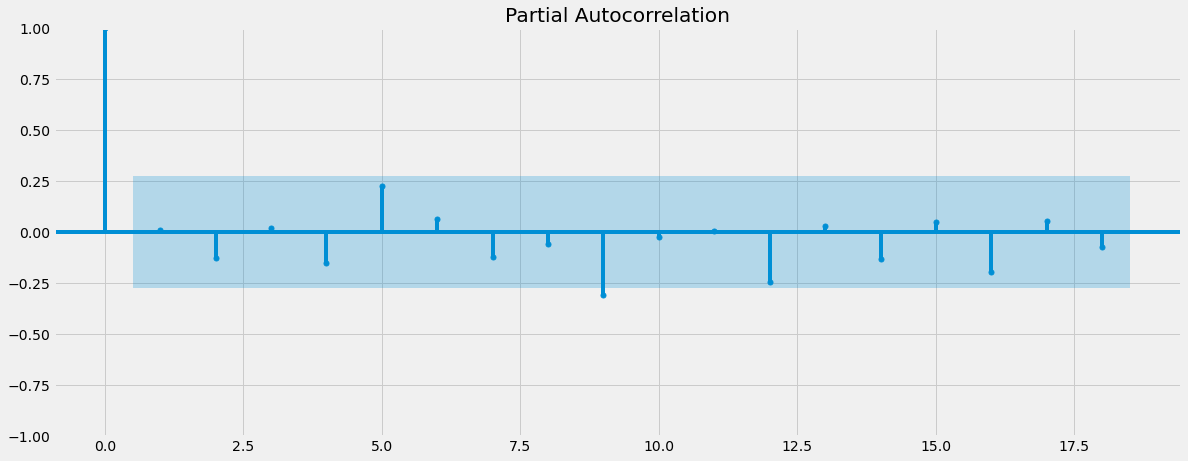

In [39]:
#plot partial autocorrelations to determine parameter p
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
from pylab import rcParams
rcParams['figure.figsize'] = 18, 7

plt.figure(figsize=(15,5), dpi=300)
plot_pacf(data_diff['Price in 2021 Dollars'])
plt.show()

We have two significant partial autocorrelations. Let's start by setting p=2 to start with.

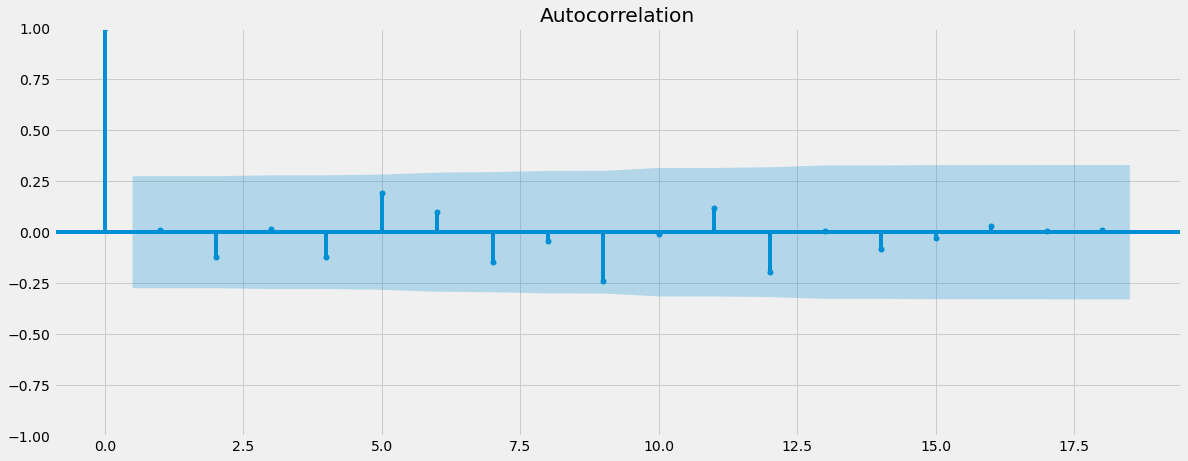

In [6]:
#plot the autocorrelations to determine paramter q
plot_acf(data_diff['Price in 2021 Dollars'])
plt.show()

Similar to the partial correlation plot. We'll set q as 1.

Because we differenced once, d will be 1 as well.

It's good to be conservative with parameters as well. If the output isn't satisfactory, then we can iterate the process until we get what we're looking for.

### Splitting the Data

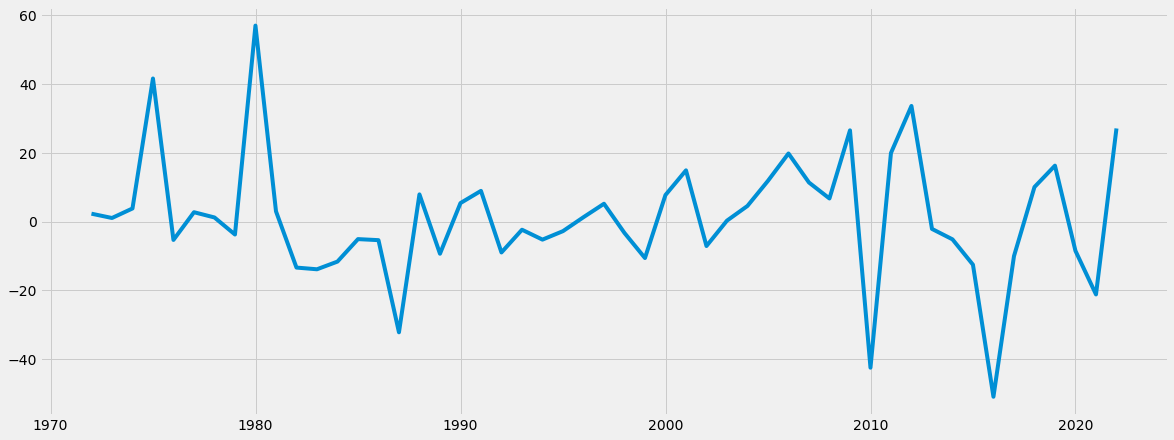

In [7]:
#figure out where to split the data
plt.plot(data_diff['Price in 2021 Dollars'])

In [8]:
data_diff

,Price in Contemporary Dollars,Price in 2021 Dollars
datetime,,
1971-12-31,0.440000,2.305074
1972-12-31,0.240000,1.050359
1973-12-31,0.810000,3.820335
1974-12-31,8.290000,41.642768
1975-12-31,-0.050000,-5.335518
1976-12-31,1.270000,2.731310
1977-12-31,1.120000,1.202125
1978-12-31,0.100000,-3.755380
1979-12-31,17.590000,57.033863


In [12]:
#split the data
train = data_diff['Price in 2021 Dollars'][:37]
test = data_diff['Price in 2021 Dollars'][36:]

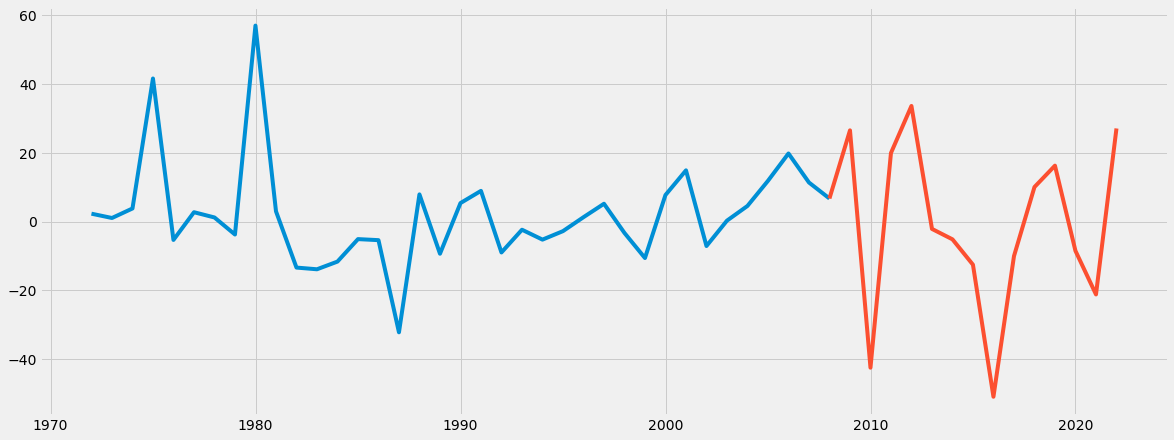

In [13]:
plt.plot(train)
plt.plot(test)

In [14]:
test.shape

(15,)

### Running and Fitting the Model

In [15]:
#import the model
from statsmodels.tsa.api import ARIMA

In [16]:
#train the model
model = ARIMA(train, order=(2,1,1))
fitted = model.fit()
print(fitted.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Price in 2021 Dollars   No. Observations:                   37
Model:                    ARIMA(2, 1, 1)   Log Likelihood                -150.309
Date:                   Tue, 16 Aug 2022   AIC                            308.619
Time:                           14:39:02   BIC                            314.953
Sample:                       12-31-1971   HQIC                           310.829
                            - 12-31-2007                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0023      0.225      0.010      0.992      -0.438       0.443
ar.L2         -0.0575      0.209     -0.275      0.783      -0.467       0.352
ma.L1         -0.8556      0

In [17]:
#forecast
fc = fitted.forecast(15, alpha=0.05)
conf = fitted.get_forecast(15, alpha=0.05).conf_int()

In [18]:
# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

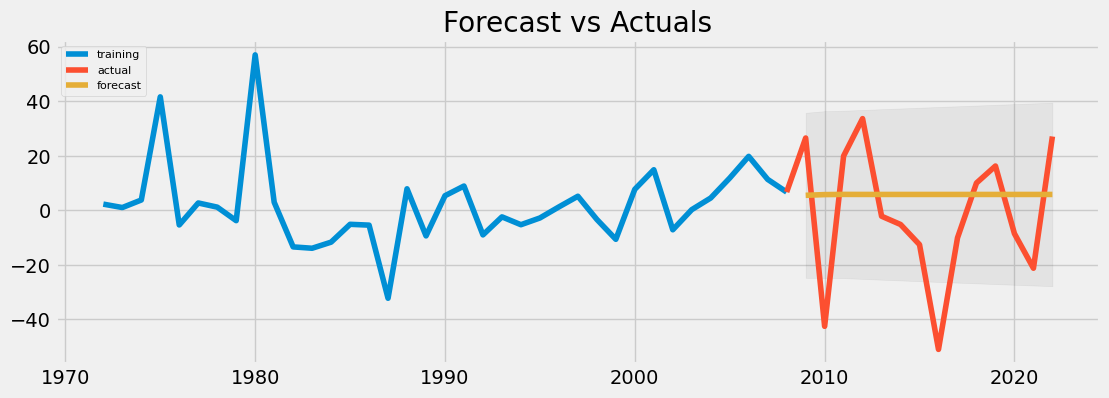

In [19]:
# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

Obviously our forecasted yellow line doesn't follow the path of our red line of actual prices, but the gray area is the confidence interval that almost captures all of what actually happened. The yellow line gives us an idea of where the prices will be on average. 

In our model output, both of the "p" parameters' coefficients were not significant. 

Lets see if we can get all of the red line within our confidence interval and all coefficents to be significant. We can iterate this process of forecasting by adjusting our parameters until we get a better model.

### Iteration

Lets try parameters (1,1,1) instead of (2,1,1).

In [20]:
#train the model
model = ARIMA(train, order=(1,1,1))
fitted = model.fit()
print(fitted.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Price in 2021 Dollars   No. Observations:                   37
Model:                    ARIMA(1, 1, 1)   Log Likelihood                -150.237
Date:                   Tue, 16 Aug 2022   AIC                            306.474
Time:                           14:47:52   BIC                            311.225
Sample:                       12-31-1971   HQIC                           308.132
                            - 12-31-2007                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0861      0.197      0.436      0.663      -0.301       0.473
ma.L1         -0.9988      8.003     -0.125      0.901     -16.683      14.686
sigma2       224.5356   1778

In [21]:
#forecast
fc = fitted.forecast(15, alpha=0.05)
conf = fitted.get_forecast(15, alpha=0.05).conf_int()

In [22]:
# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

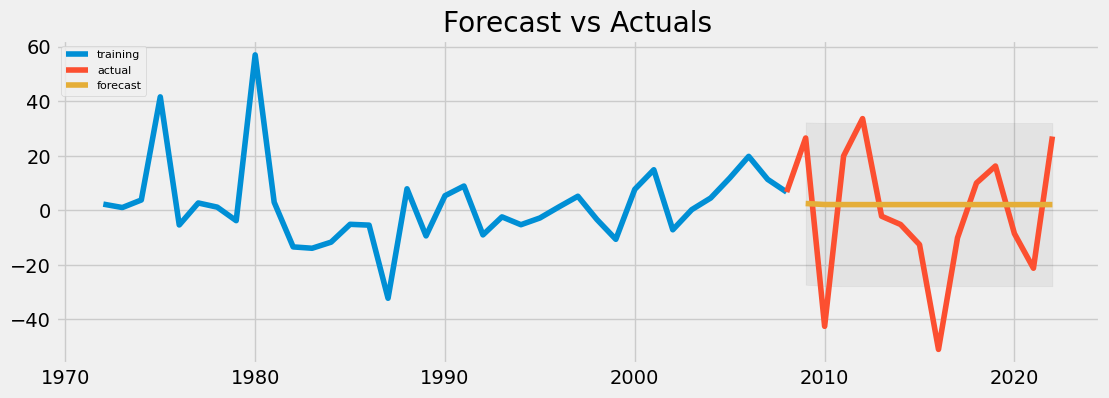

In [23]:
# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

This model is worse than what we started with. Now none of our coefficents are significant. Let's try (2,1,2).

In [38]:
#train the model
model = ARIMA(train, order=(2,1,2))
fitted = model.fit()
print(fitted.summary())

                                 SARIMAX Results                                 
Dep. Variable:     Price in 2021 Dollars   No. Observations:                   37
Model:                    ARIMA(2, 1, 2)   Log Likelihood                -149.794
Date:                   Tue, 16 Aug 2022   AIC                            309.589
Time:                           15:15:09   BIC                            317.506
Sample:                       12-31-1971   HQIC                           312.352
                            - 12-31-2007                                         
Covariance Type:                     opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.8600      0.296     -2.903      0.004      -1.440      -0.279
ar.L2          0.0410      0.211      0.195      0.846      -0.372       0.454
ma.L1         -0.0010   2493

In [34]:
#forecast
fc = fitted.forecast(15, alpha=0.05)
conf = fitted.get_forecast(15, alpha=0.05).conf_int()

In [35]:
# Make into pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf.iloc[:, 0], index=test.index)
upper_series = pd.Series(conf.iloc[:, 1], index=test.index)

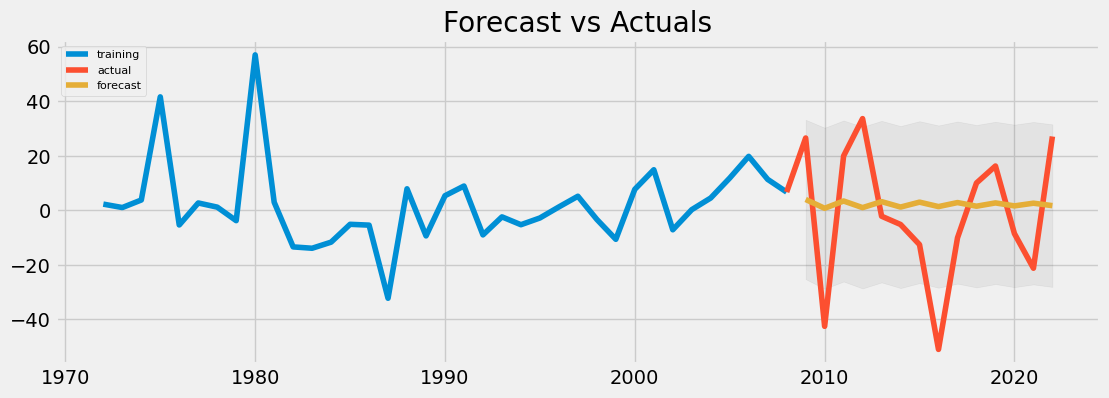

In [36]:
# Plot
plt.figure(figsize=(12,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.05)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

We can see here by increasing q, the line adjusts itself even more for the amount of error it calculated from the last point. The yellow line does a bit better at following the red line, but it's a less accurate forecast. We'll stick with (2,1,1) as the best model we can get.